<h1>Initialization</h1>
<p>Three initialization methods</p>
<ul>
    <li>Random initialization</li>
    <li>Zero initialization</li>
    <li>Xavier initialization</li>
    <li>Kaiming initialization</li>
</ul>

<h2>Import Dependencies</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation, update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

<h2>Loading Dataset</h2>

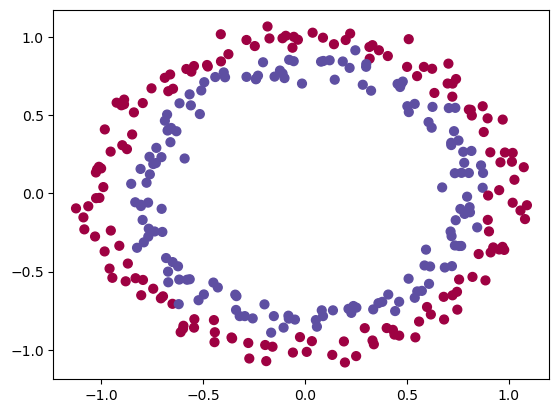

In [2]:
train_X, train_Y, test_X, test_Y = load_dataset()

<h2>Neural Network</h2>

In [3]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = 'random'):
    '''
    the neural network
    
    Args:
    X -- input data
    Y -- true "label" vector
    learning_rate -- learning rate for gradient descent 
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    
    Returns:
    parameters -- parameters learnt by the model
    '''
    
    grads = {}
    costs = [] 
    m = X.shape[1] 
    layers_dims = [X.shape[0], 10, 5, 1]
    
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "kaiming":
        parameters = initialize_parameters_kaiming(layers_dims)
    elif initialization == "xavier":
        parameters = initialize_parameters_xavier(layers_dims)

    for i in range(num_iterations):
        a3, cache = forward_propagation(X, parameters)
    
        cost = compute_loss(a3, Y)
      
        grads = backward_propagation(X, Y, cache)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    
    return parameters

<h2>Random Initialization</h2>

In [4]:
def initialize_parameters_random(layers_dims):
    '''
    Args:
    layers_dims -- python list contains the size of neural network
    
    Returns:
    parameters -- initialized parameters
    '''
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)

    for i in range(1, L):
        parameters['W' + str(i)] = np.random.randn(layers_dims[i], layers_dims[i-1]) * 10
        parameters['b' + str(i)] = np.zeros((layers_dims[i], 1))
    
    return parameters

In [5]:
# check the parameters

parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


Cost after iteration 0: inf


/Users/mitchell/Desktop/Machine-Learning-Practice/Deep_Learning/Initialization/init_utils.py:137: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/Users/mitchell/Desktop/Machine-Learning-Practice/Deep_Learning/Initialization/init_utils.py:137: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 1000: 0.6242392873528801
Cost after iteration 2000: 0.5978793920253644
Cost after iteration 3000: 0.5636630610382829
Cost after iteration 4000: 0.5500976426424378
Cost after iteration 5000: 0.54435902543868
Cost after iteration 6000: 0.5373682225170859
Cost after iteration 7000: 0.47066283508496976
Cost after iteration 8000: 0.3976802024447791
Cost after iteration 9000: 0.39345106482121567
Cost after iteration 10000: 0.39201455483522224
Cost after iteration 11000: 0.38911408564956573
Cost after iteration 12000: 0.3861333817923242
Cost after iteration 13000: 0.3849756019833332
Cost after iteration 14000: 0.3827440504199218


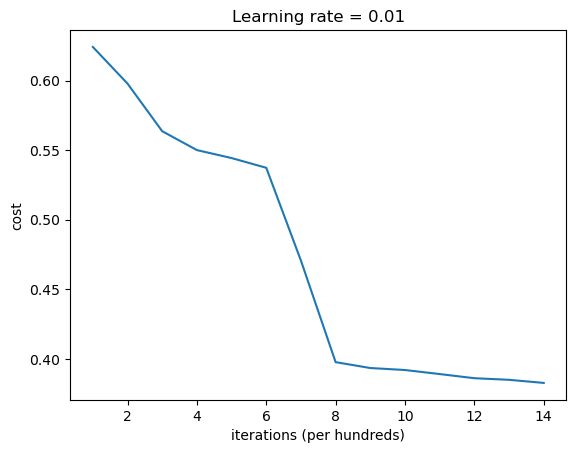

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [6]:
# using random parameters to train the network

parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [7]:
print(f'prediction on training set: \n {predictions_train}')
print(f'prediction on test set: \n {predictions_test}')

prediction on training set: 
 [[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
prediction on test set: 
 [[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


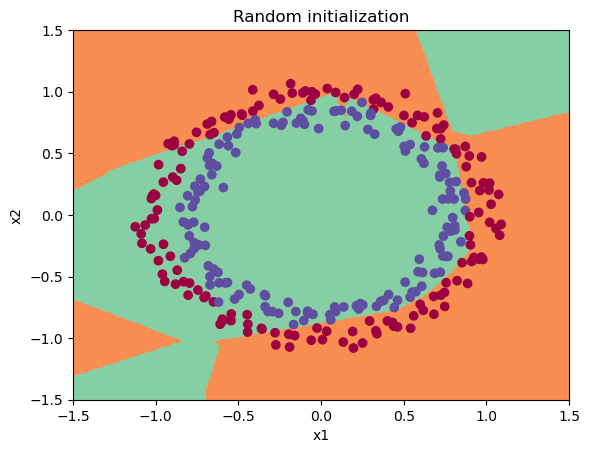

In [8]:
plt.title('Random initialization')
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<h2>Zero Initialization</h2>

In [9]:
def initialize_parameters_zeros(layers_dims):
    '''
    Args:
    layers_dims -- python list contains the size of neural network
    
    Returns:
    parameters -- initialized parameters
    '''
    
    parameters = {}
    L = len(layers_dims)
    
    for i in range(1, L):
        parameters['W' + str(i)] = np.zeros((layers_dims[i], layers_dims[i-1]))
        parameters['b' + str(i)] = np.zeros((layers_dims[i], 1))
    
    return parameters

In [10]:
# check the parameters

parameters = initialize_parameters_zeros([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


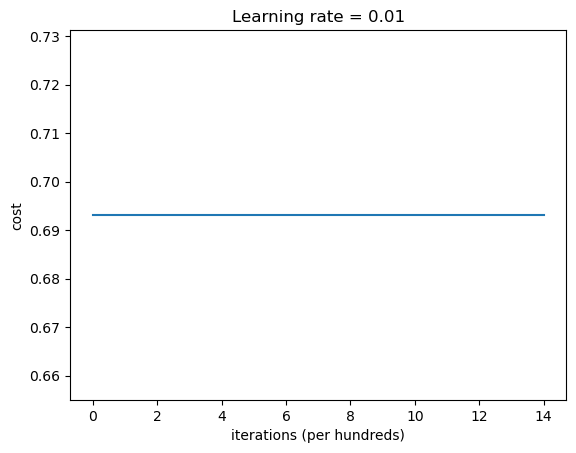

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [11]:
# using zero parameters to train the network

parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [12]:
print(f'prediction on training set: \n {predictions_train}')
print(f'prediction on test set: \n {predictions_test}')

prediction on training set: 
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
prediction on test set: 
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


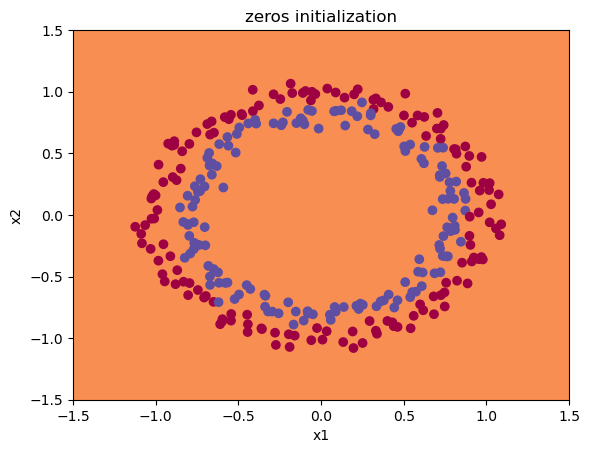

In [13]:
plt.title('zeros initialization')
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<h2>Xavier Initialization</h2>

In [14]:
def initialize_parameters_xavier(layers_dims):
    '''
    Args:
    layers_dims -- python list contains the size of neural network
    
    Returns:
    parameters -- initialized parameters
    '''
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    
    for i in range(1, L):
        parameters['W' + str(i)] = np.random.uniform(low=-np.sqrt(1/layers_dims[i-1]), high=np.sqrt(1/layers_dims[i-1]), size=(layers_dims[i], layers_dims[i-1]))
        parameters['b' + str(i)] = np.zeros((layers_dims[i], 1))

    return parameters

In [15]:
# check the parameters

parameters = initialize_parameters_xavier([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.05865637  0.2403484  -0.24144241]
 [ 0.01250264  0.45373606  0.45759984]]
b1 = [[0.]
 [0.]]
W2 = [[-0.52950233 -0.41402109]]
b2 = [[0.]]


Cost after iteration 0: 0.6941930708558666
Cost after iteration 1000: 0.6937476247614401
Cost after iteration 2000: 0.6934254666248996
Cost after iteration 3000: 0.6931918196042441
Cost after iteration 4000: 0.6929981635412358
Cost after iteration 5000: 0.6928035854368798
Cost after iteration 6000: 0.6925951913666617
Cost after iteration 7000: 0.6923512106837221
Cost after iteration 8000: 0.6920640934579941
Cost after iteration 9000: 0.6917156108901501
Cost after iteration 10000: 0.691287058935039
Cost after iteration 11000: 0.6907486169690473
Cost after iteration 12000: 0.6899276712184663
Cost after iteration 13000: 0.6882410883069673
Cost after iteration 14000: 0.6863956202302519


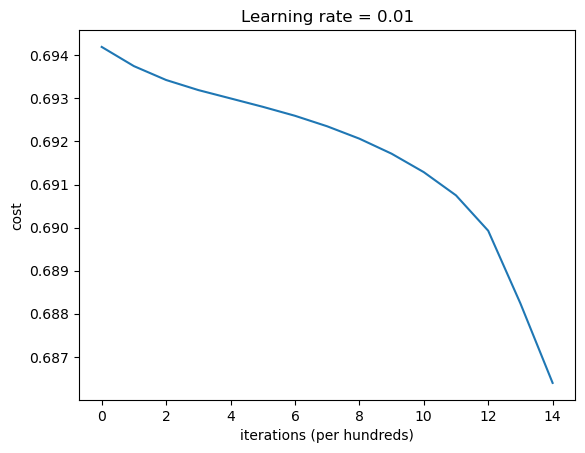

On the train set:
Accuracy: 0.6166666666666667
On the test set:
Accuracy: 0.58


In [16]:
# using Xaiver parameters to train the network

parameters = model(train_X, train_Y, initialization = "xavier")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [17]:
print(f'prediction on training set: \n {predictions_train}')
print(f'prediction on test set: \n {predictions_test}')

prediction on training set: 
 [[0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1
  1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0
  0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0
  1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1
  0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1
  0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1
  1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0
  0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1
  0 1 1 1 1 0 1 1 1 1 1 0]]
prediction on test set: 
 [[1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
  1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1]]


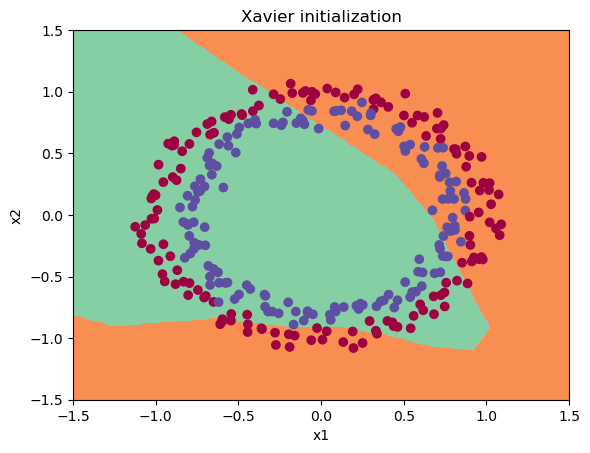

In [18]:
plt.title('Xavier initialization')
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<h2>Kaiming Initialization</h2>

In [19]:
def initialize_parameters_kaiming(layers_dims):
    '''
    Args:
    layers_dims -- python list contains the size of neural network
    
    Returns:
    parameters -- initialized parameters
    '''
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    
    for i in range(1, L):
        parameters['W' + str(i)] = np.random.normal(loc=0, scale=np.sqrt(2/layers_dims[i-1]), size=(layers_dims[i], layers_dims[i-1]))
        parameters['b' + str(i)] = np.zeros((layers_dims[i], 1))
        
    return parameters

In [20]:
# check the parameters

parameters = initialize_parameters_kaiming([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.46040903  0.3564088   0.07878985]
 [-1.52153542 -0.22648652 -0.28965949]]
b1 = [[0.]
 [0.]]
W2 = [[-0.08274148 -0.62700068]]
b2 = [[0.]]


Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572937
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071793
Cost after iteration 7000: 0.311780346484444
Cost after iteration 8000: 0.23696215330322562
Cost after iteration 9000: 0.1859728720920683
Cost after iteration 10000: 0.15015556280371808
Cost after iteration 11000: 0.12325079292273548
Cost after iteration 12000: 0.09917746546525935
Cost after iteration 13000: 0.08457055954024277
Cost after iteration 14000: 0.07357895962677363


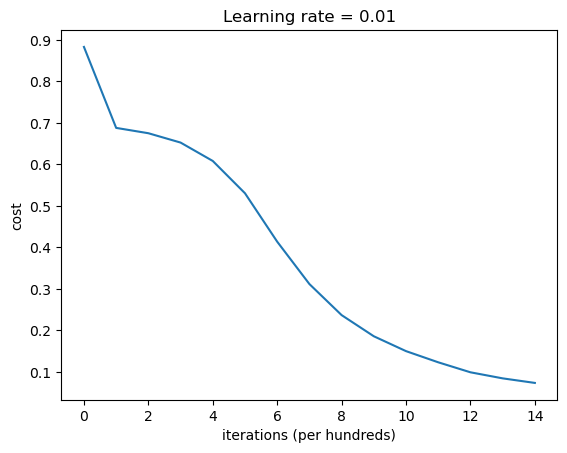

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [21]:
# using Kaiming parameters to train the network

parameters = model(train_X, train_Y, initialization = "kaiming")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [22]:
print(f'prediction on training set: \n {predictions_train}')
print(f'prediction on test set: \n {predictions_test}')

prediction on training set: 
 [[1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0
  0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0
  0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0
  0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0
  1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1
  0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0
  1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1
  1 1 1 0 0 0 0 1 1 0 1 0]]
prediction on test set: 
 [[1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1
  0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0
  1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0]]


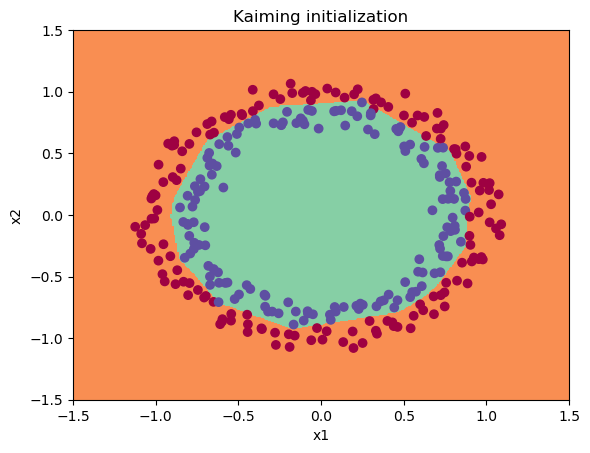

In [23]:
plt.title('Kaiming initialization')
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)